In [1]:
%ls ../

data.csv             task2/               train.csv
data_preprocess.csv  task3/
task1/               test.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../data.csv',encoding='gbk')

In [252]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [253]:
# 数据类型的分析
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [254]:
# 对于数据类型进行统计
data.dtypes.value_counts()

float64    70
int64      13
object      7
dtype: int64

In [255]:
#查看表头
data.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

In [256]:
print(data.columns[75:])

Index(['loans_latest_time', 'loans_credit_limit', 'loans_credibility_limit',
       'loans_org_count_current', 'loans_product_count', 'loans_max_limit',
       'loans_avg_limit', 'consfin_credit_limit', 'consfin_credibility',
       'consfin_org_count_current', 'consfin_product_count',
       'consfin_max_limit', 'consfin_avg_limit', 'latest_query_day',
       'loans_latest_day'],
      dtype='object')


In [257]:
#可视化各个特征、数据分布特点
list1 = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature']

list2 = ['repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month']

list3 = ['trans_top_time_last_6_month', 'consume_top_time_last_1_month',
       'consume_top_time_last_6_month', 'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'max_consume_count_later_6_month',
       'railway_consume_count_last_12_month',
       'pawns_auctions_trusts_consume_last_1_month',
       'pawns_auctions_trusts_consume_last_6_month',
       'jewelry_consume_count_last_6_month', 'status']

list4 = ['source', 'first_transaction_day', 'trans_day_last_12_month', 'id_name',
       'apply_score', 'apply_credibility', 'query_org_count',
       'query_finance_count', 'query_cash_count', 'query_sum_count',
       'latest_query_time', 'latest_one_month_apply',
       'latest_three_month_apply', 'latest_six_month_apply', 'loans_score']

list5 = ['loans_credibility_behavior', 'loans_count', 'loans_settle_count',
       'loans_overdue_count', 'loans_org_count_behavior',
       'consfin_org_count_behavior', 'loans_cash_count',
       'latest_one_month_loan', 'latest_three_month_loan',
       'latest_six_month_loan', 'history_suc_fee', 'history_fail_fee',
       'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time']

list6 = ['loans_latest_time', 'loans_credit_limit', 'loans_credibility_limit',
       'loans_org_count_current', 'loans_product_count', 'loans_max_limit',
       'loans_avg_limit', 'consfin_credit_limit', 'consfin_credibility',
       'consfin_org_count_current', 'consfin_product_count',
       'consfin_max_limit', 'consfin_avg_limit', 'latest_query_day',
       'loans_latest_day']

In [258]:
print(len(list1),len(list2)
,len(list3)
,len(list4)
,len(list5)
,len(list6))

15 15 15 15 15 15


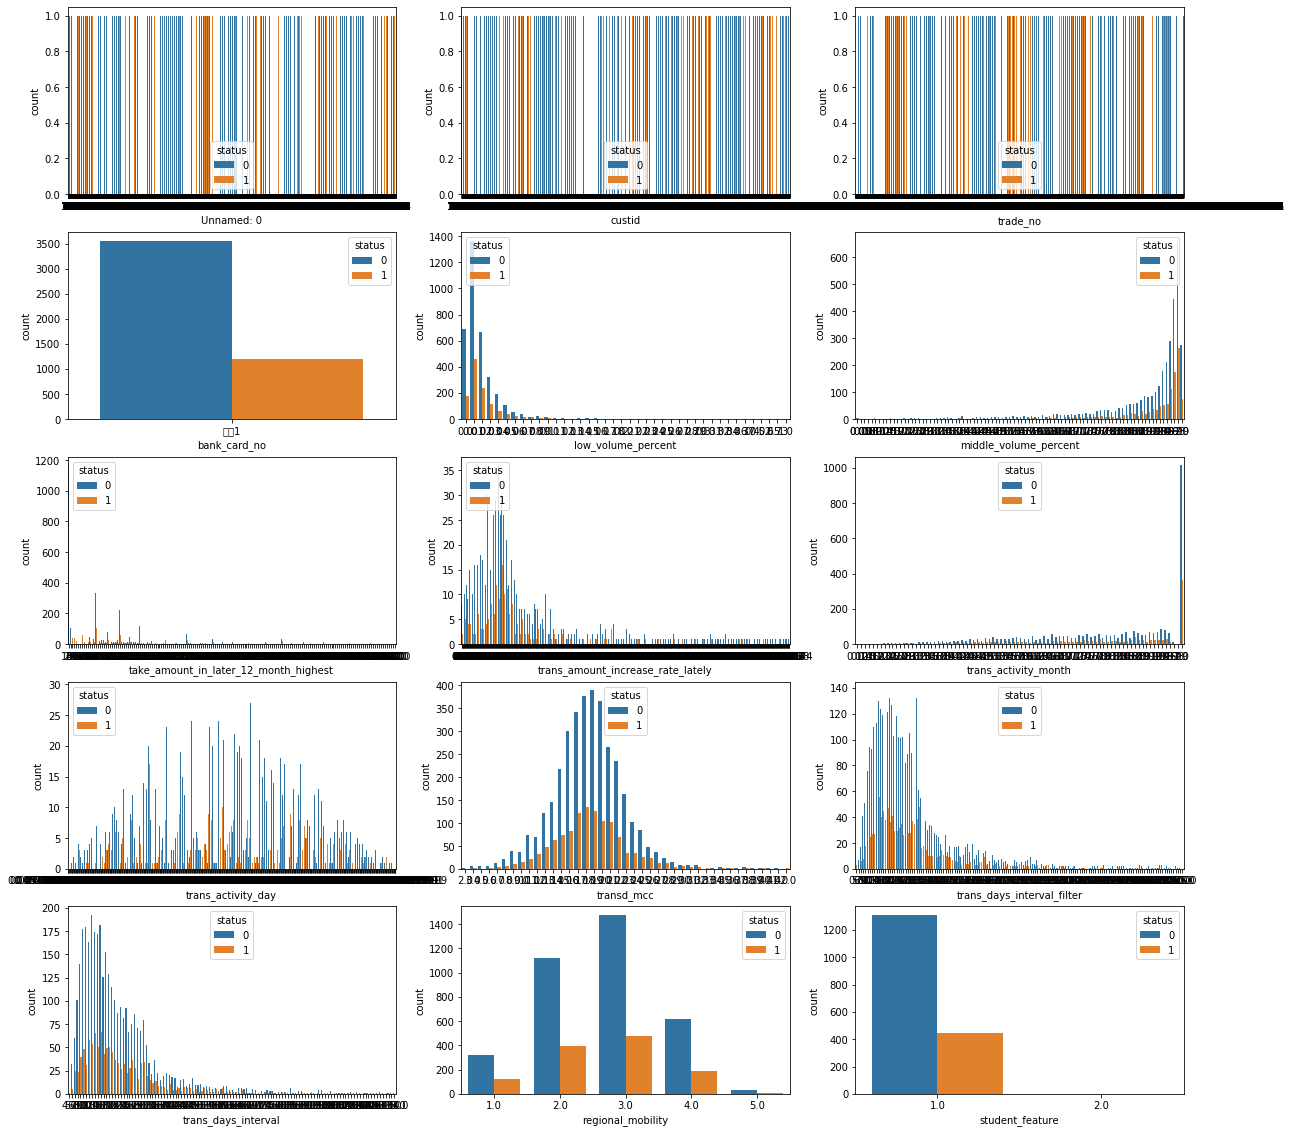

In [11]:
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list1):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

import warnings
warnings.filterwarnings('ignore')
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list1):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

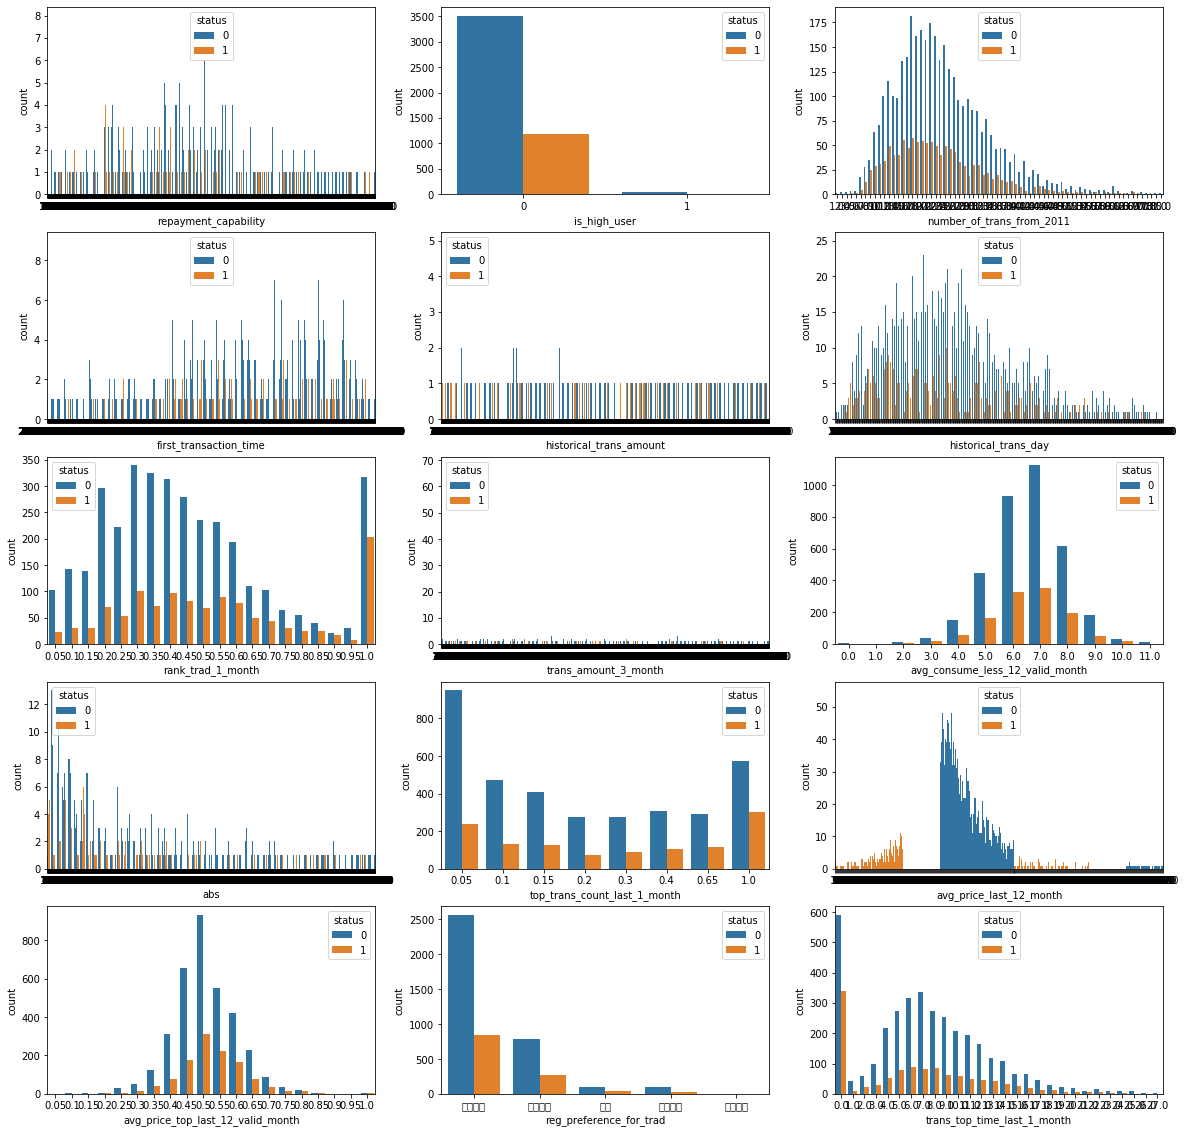

In [12]:
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list2):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

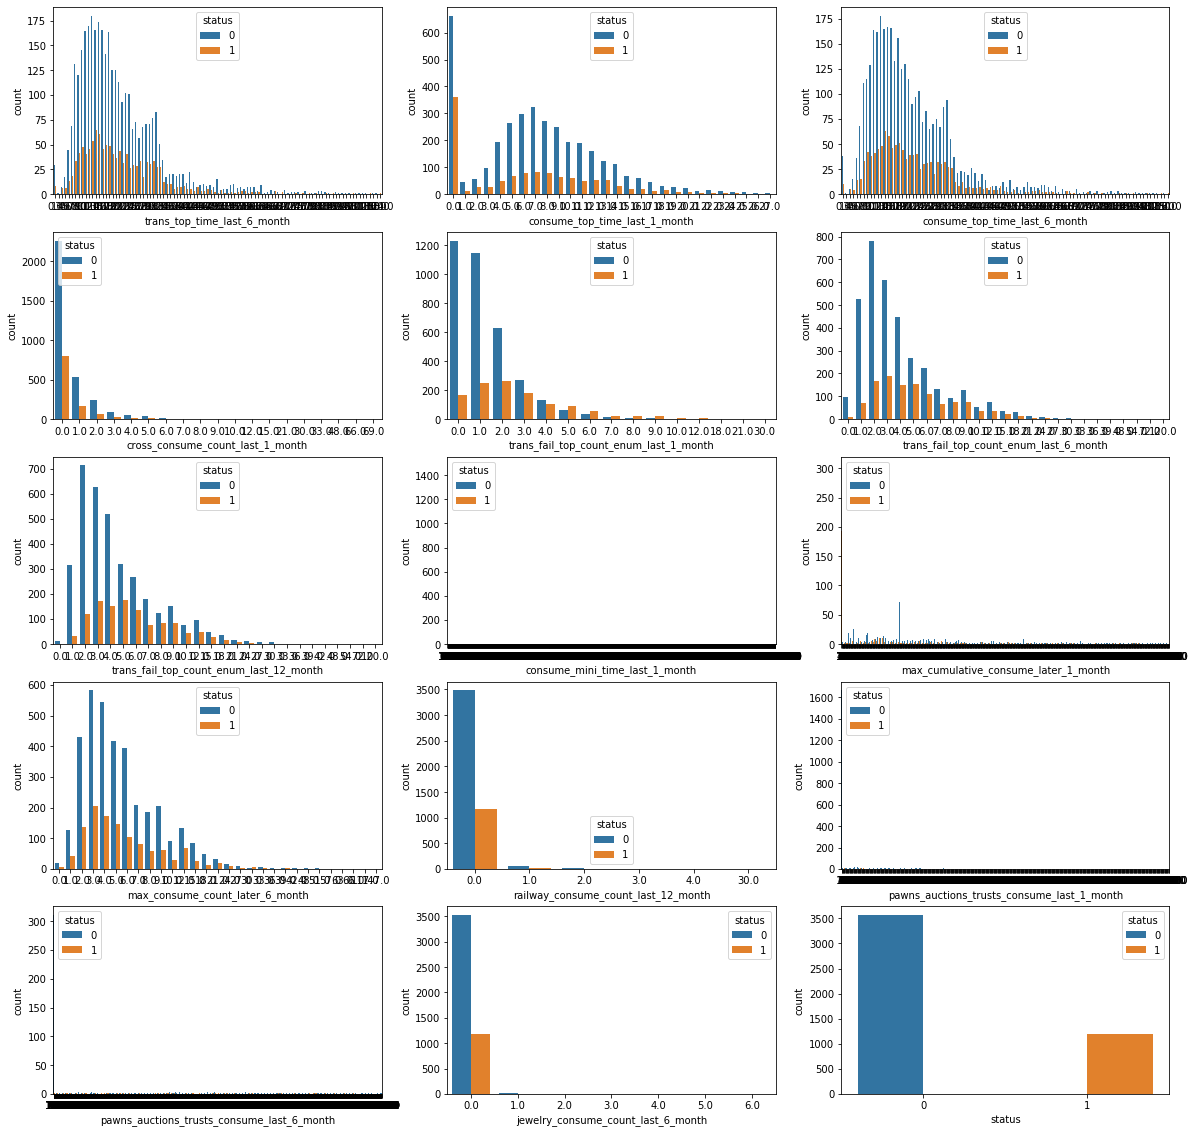

In [13]:
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list3):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

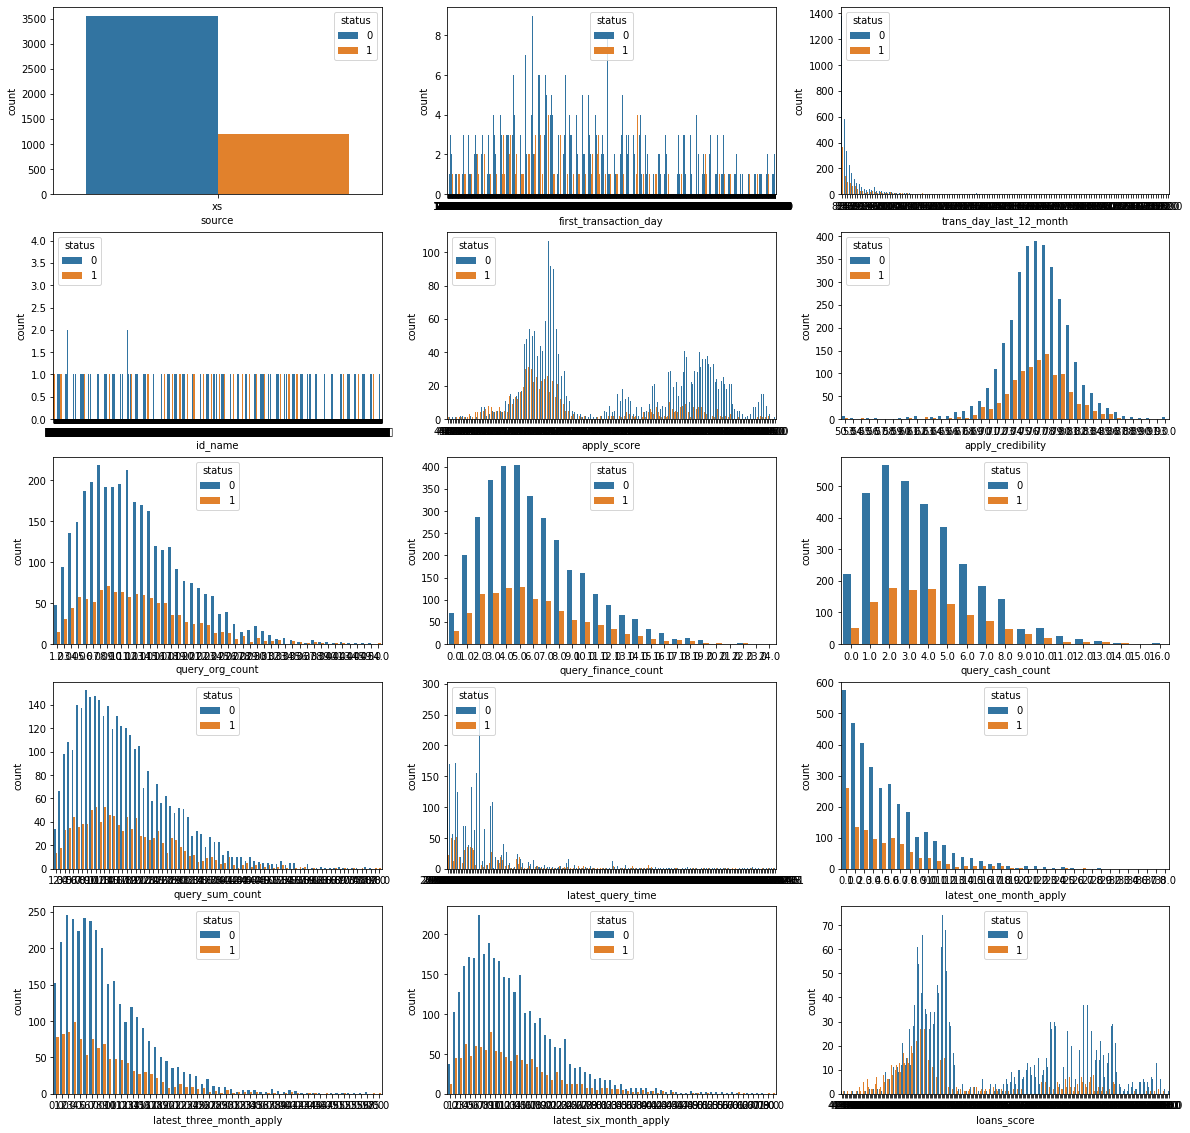

In [14]:
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list4):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

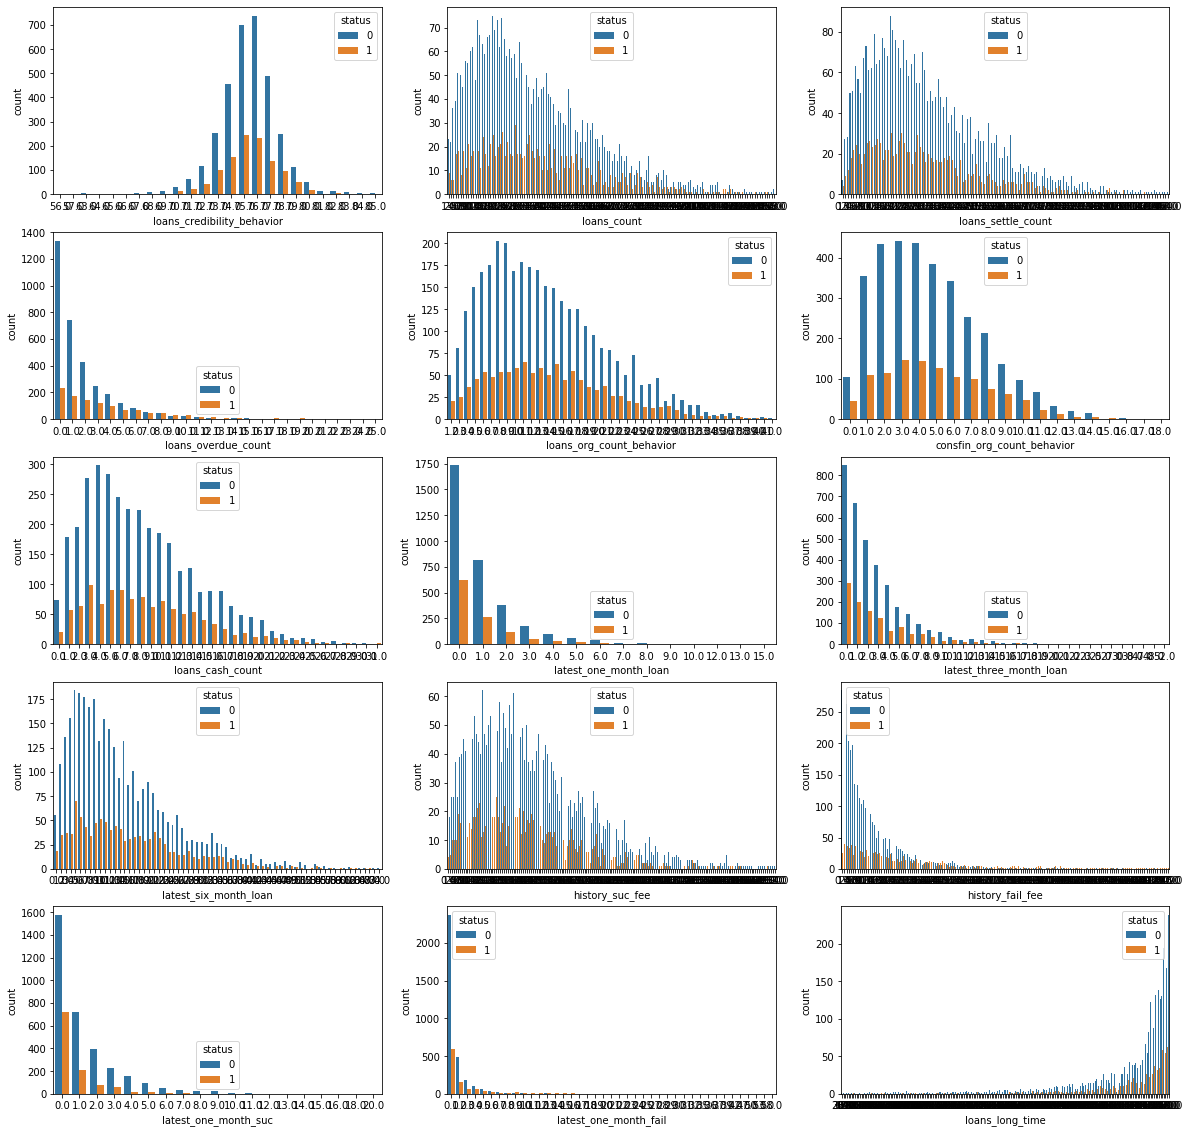

In [15]:
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list5):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

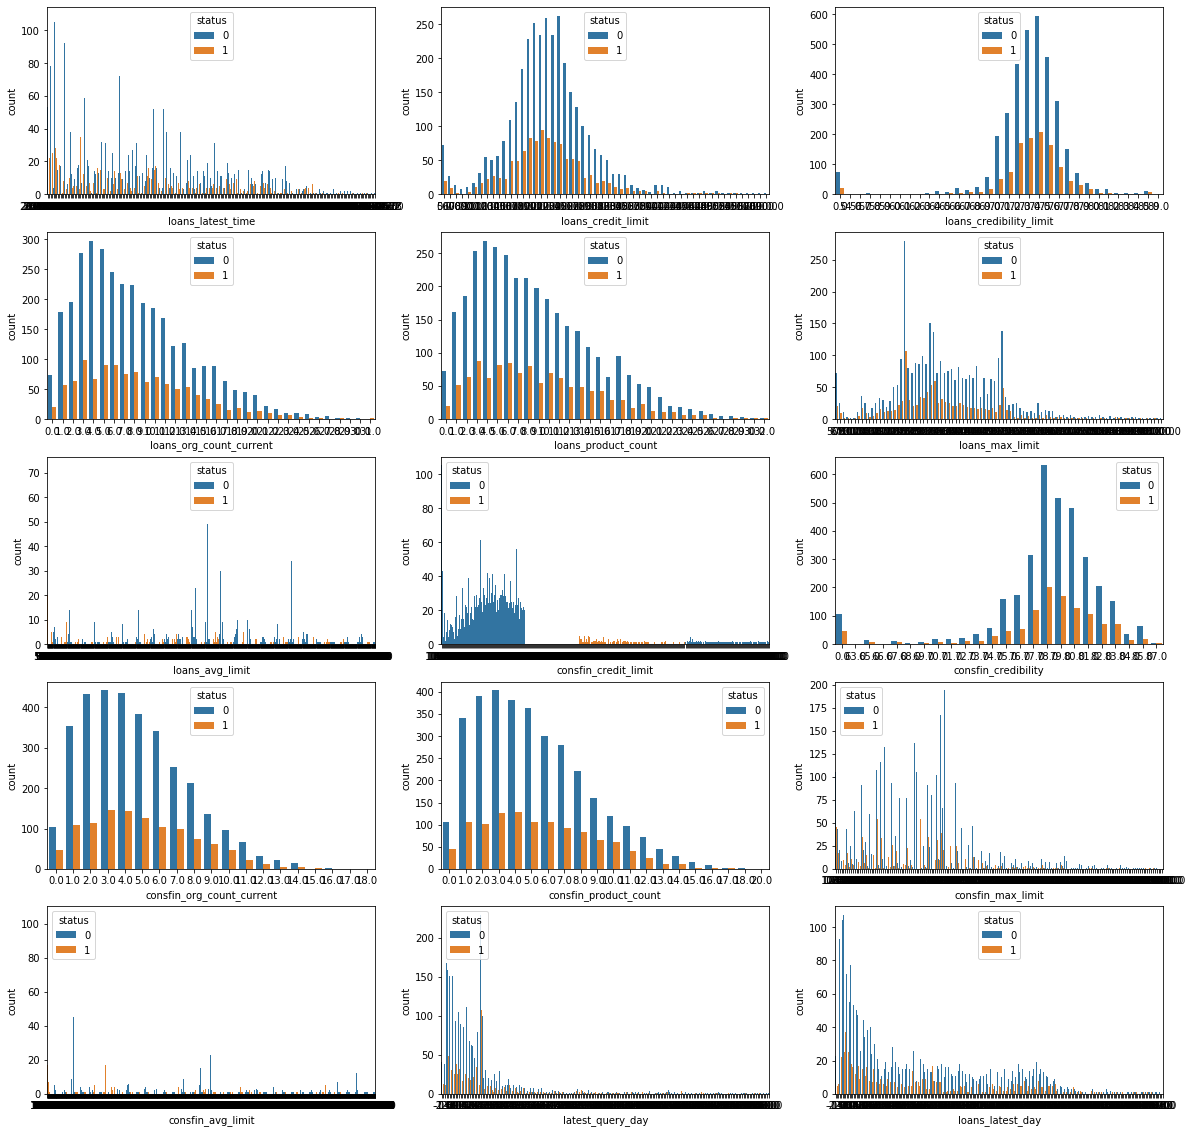

In [16]:
f,ax =plt.subplots(5,3,figsize=(20,20))
for i,name in enumerate(list6):
    sns.countplot(data=data, x =name, hue='status', ax=ax[i//3][i%3])
plt.show()

In [259]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


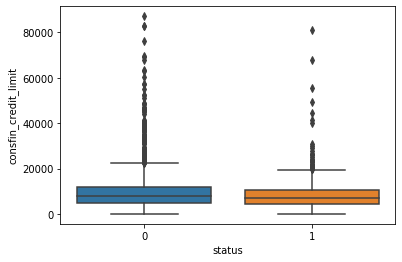

In [260]:
sns.boxplot(y = 'consfin_credit_limit',x ='status',data=data)
plt.show()

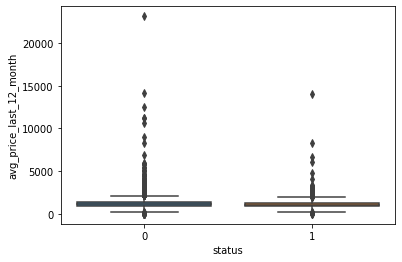

In [261]:
sns.boxplot(y = 'avg_price_last_12_month',x ='status',data=data)
plt.show()

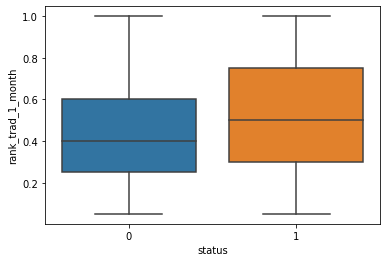

In [262]:
sns.boxplot(y = 'rank_trad_1_month',x ='status',data=data)
plt.show()

In [263]:
#对时间数据进行处理
from dateutil.parser import parse

In [264]:
data[data.first_transaction_day.isnull()].T

,2703,3740
Unnamed: 0,6760,9453
custid,2346029,2123079
trade_no,20180507122903344000000023090358,20180507123543218000000023096586
bank_card_no,卡号1,卡号1
low_volume_percent,NaN,NaN
middle_volume_percent,NaN,NaN
take_amount_in_later_12_month_highest,0,0
trans_amount_increase_rate_lately,NaN,NaN
trans_activity_month,NaN,NaN
trans_activity_day,NaN,NaN


In [265]:
# first_transaction time 和 day
#first_transaction_day 是通过2018-05-21这天和first_transaction_time的差值
a = data[data.first_transaction_day.notnull()]
a.first_transaction_day = a.first_transaction_day.astype(int)
a.first_transaction_day = a.first_transaction_day.astype('timedelta64[D]')
a.first_transaction_time = pd.to_datetime(a.first_transaction_time.astype(int),format='%Y%m%d')
a.survey_time = a.first_transaction_day + a.first_transaction_time
a.survey_time.unique()

array(['2018-05-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [266]:
# latest_query time 和 day
b = data[data.latest_query_day.notnull()]
b.latest_query_day =b.latest_query_day.astype(int)
b.latest_query_day =b.latest_query_day.astype('timedelta64[D]')
b.latest_query_time = pd.to_datetime(b.latest_query_time)
b.survey_time_trans = b.latest_query_day + b.latest_query_time
b.survey_time_trans.value_counts()

2018-05-07    3434
2018-05-04    1007
2018-05-08       9
dtype: int64

In [267]:
c = data[data.loans_latest_time.notnull()]
c.loans_latest_day = c.loans_latest_day.astype(int)
c.loans_latest_day = c.loans_latest_day.astype('timedelta64[D]')
c.loans_latest_time = pd.to_datetime(c.loans_latest_time)
c.survey_time_trans = c.loans_latest_time + c.loans_latest_day
b.survey_time_trans.value_counts()

2018-05-07    3434
2018-05-04    1007
2018-05-08       9
dtype: int64

In [268]:
data = data[data.first_transaction_day.notnull()]
data['first_transaction_time'] = pd.to_datetime(data.first_transaction_time)
# print(data.first_transaction_time)
data['trans_time'] = pd.to_datetime(data.trade_no.apply(lambda x :str(x)[:8]))
# print(data.trans_time)
# print(data.first_transaction_time)
data['first_transaction_day_'] = data.trans_time - data.first_transaction_time
data.trans_time = pd.to_datetime(data.trans_time)
data.first_transaction_day_ = (data.first_transaction_day_ / np.timedelta64(1,'D')).astype(int)
# data.first_transaction_day_

In [269]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,first_transaction_day_
count,4752.000000,4.752000e+03,4752.000000,4752.000000,4752.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4448.000000,4455.000000,4752.000000
mean,6007.531145,1.690765e+06,0.021806,0.901294,1941.014310,14.160674,0.804411,0.365425,17.502946,29.029920,...,1820.522110,9187.586981,76.041975,4.731762,5.226936,16153.535354,8008.078339,24.116007,55.170370,17656.331650
std,3452.418950,1.034390e+06,0.041527,0.144856,3924.595364,694.180473,0.196920,0.170196,4.475616,22.722432,...,583.477472,7372.836703,14.540045,2.975142,3.409934,14304.131791,5680.624864,37.732737,53.492299,1.251841
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,17654.000000
25%,3104.750000,7.592655e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,1535.500000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000,17657.000000
50%,6005.500000,1.633976e+06,0.010000,0.960000,550.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000,17657.000000
75%,8997.000000,2.598974e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000,17657.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000,17658.000000


In [270]:
nan_rate = pd.DataFrame((data.shape[0]-data.count())/data.shape[0])
nan_rate.sort_values(by = 0,ascending=False)

,0
student_feature,0.630471
cross_consume_count_last_1_month,0.089226
apply_credibility,0.063973
latest_one_month_apply,0.063973
latest_query_time,0.063973
query_sum_count,0.063973
query_cash_count,0.063973
query_finance_count,0.063973
query_org_count,0.063973
latest_three_month_apply,0.063973


In [271]:
# from sklearn.preprocessing import OneHotEncoder
# data['reg_preference_for_trad'] = OneHotEncoder().fit_transform(data['reg_preference_for_trad'].values.reshape(-1,1))

In [272]:
data['reg_preference_for_trad'].fillna('其他城市',inplace = True)

In [273]:
data.iloc[2703]['reg_preference_for_trad']

'二线城市'

In [274]:
data.shape
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [277]:
# # 数据类型转换,部分特征不是数值性特征，我们需要对数据类型进行转换
data['reg_preference_for_trad'].replace({'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他城市':5},inplace = True)

In [278]:
data.shape
data['reg_preference_for_trad'].value_counts()

1    3403
3    1064
4     150
2     131
5       4
Name: reg_preference_for_trad, dtype: int64

In [279]:
#trade_no、custid、Unnamed：0，bank_card_no明显可以删除,student_feature缺失太多
data_drop = data.drop(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no','id_name','latest_query_time','source','loans_latest_time','first_transaction_time','first_transaction_day','student_feature','trans_time','loans_latest_day','latest_query_time','student_feature'],axis=1)

In [280]:
data = data_drop
data.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,first_transaction_day_
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,17657
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,17657
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,17657
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,17657
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,17657


In [282]:
#缺失值处理
classification = ['regional_mobility','is_high_user','avg_consume_less_12_valid_month','status']
continuous = data.drop(classification,axis = 1)
classified = data[classification]
from sklearn.preprocessing import Imputer
# 针对分类特征使用众数进行填充
for i in range(classified.shape[1]):
    feature = classified.iloc[:,i].values.reshape(-1,1)  
    imp_mode = Imputer(strategy='most_frequent')
    classified.iloc[:,i] = imp_mode.fit_transform(feature)
# 针对连续型特征使用中位数进行填充
for i in range(continuous.shape[1]):
    feature = continuous.iloc[:,i].values.reshape(-1,1)  #sklearn中特征矩阵必须是二维
    imp_mode = Imputer(strategy='median')
    continuous.iloc[:,i] = imp_mode.fit_transform(feature)


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 4753
Data columns (total 79 columns):
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4752 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
repayment_capability                          4752 non-null int64
is_high_user                                  4752 non-null int64
number_of_trans_from_2011                     4752 non-null float64
historical_tran

In [303]:
# 缺失数据填充
classification = ['regional_mobility','is_high_user','avg_consume_less_12_valid_month','reg_preference_for_trad','status']
continuous = data.drop(classification,axis = 1)
classified = data[classification]

In [308]:
continuous.columns

Index(['low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'repayment_capability',
       'number_of_trans_from_2011', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'abs', 'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month',
       'trans_top_time_last_6_month', 'consume_top_time_last_1_month',
       'consume_top_time_last_6_month', 'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'max_consume_count_later_6

In [304]:
from sklearn.preprocessing import Imputer
for i in range(continuous.shape[1]):
    feature = continuous.iloc[:,i].values.reshape(-1,1)  #sklearn中特征矩阵必须是二维
    imp_mode = Imputer(strategy='median')
    continuous.iloc[:,i] = imp_mode.fit_transform(feature)
for i in range(classified.shape[1]):
    feature = classified.iloc[:,i].values.reshape(-1,1)  
    imp_mode = Imputer(strategy='most_frequent')
    classified.iloc[:,i] = imp_mode.fit_transform(feature)

In [310]:
data = pd.concat([classified,continuous],axis=1)

In [316]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=2018)
train_data.to_csv('./train.csv', index=False, header=True)
test_data.to_csv('./test.csv', index=False, header=True)
data.to_csv('../data_preprocess.csv', index=False, header=True)

In [317]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 148 to 1274
Data columns (total 79 columns):
regional_mobility                             3326 non-null float64
is_high_user                                  3326 non-null float64
avg_consume_less_12_valid_month               3326 non-null float64
reg_preference_for_trad                       3326 non-null float64
status                                        3326 non-null float64
low_volume_percent                            3326 non-null float64
middle_volume_percent                         3326 non-null float64
take_amount_in_later_12_month_highest         3326 non-null float64
trans_amount_increase_rate_lately             3326 non-null float64
trans_activity_month                          3326 non-null float64
trans_activity_day                            3326 non-null float64
transd_mcc                                    3326 non-null float64
trans_days_interval_filter                    3326 non-null float64
trans_d